In [1]:
#Importando pandas
import pandas as pd

In [5]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx",engine="openpyxl")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [6]:
#Juntado os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
df["LojaID"].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

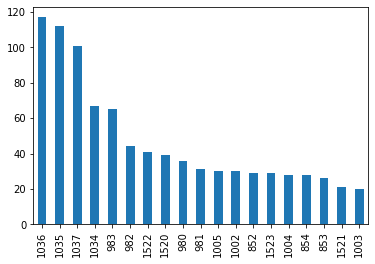

In [8]:
#Grafico de barras
df["LojaID"].value_counts(ascending = False).plot.bar()

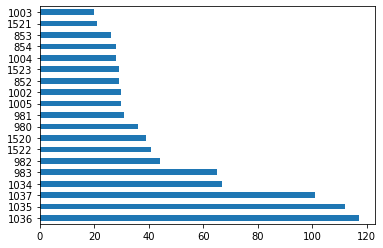

In [9]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

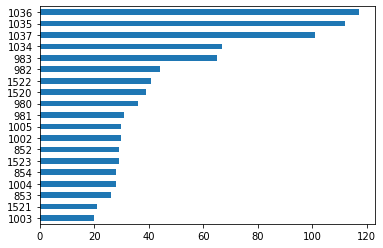

In [10]:
#Grafico de barra horizontais
df["LojaID"].value_counts(ascending =True).plot.barh()

In [12]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

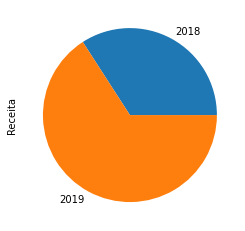

In [13]:
#Grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [14]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

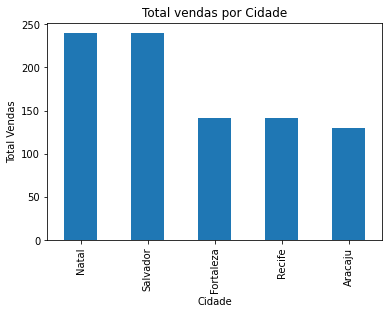

In [15]:
#Adicionando um t´titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title= "Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [16]:
#Alterando a cor 
plt.style.use("ggplot")

In [17]:
#Criando acoluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

Text(0, 0.5, 'Total Vendas')

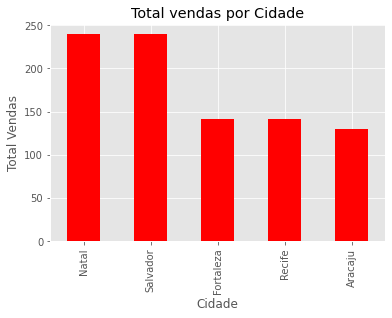

In [18]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title= "Total vendas por Cidade", color ="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [19]:
#Alterando o estilo
plt.style.use("ggplot")

In [20]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)


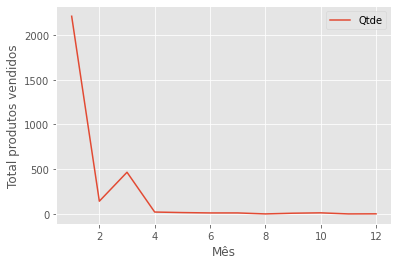

In [21]:

df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

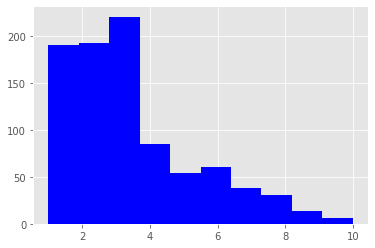

In [23]:
#Misograma
plt.hist(df["Qtde"], color="blue")

In [29]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [34]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [35]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

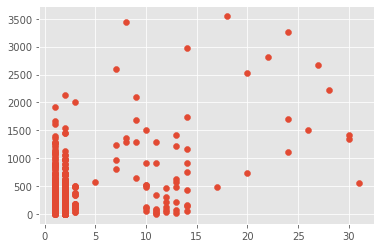

In [36]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

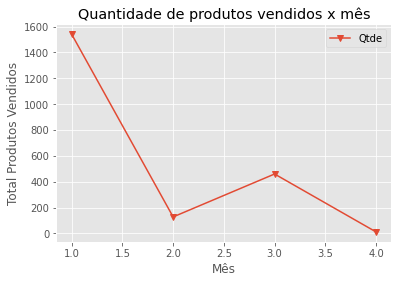

In [37]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")